In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [4]:
le = LabelEncoder()
cols = ["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
for col in cols:
    df[col] = le.fit_transform(df[col])
df.dtypes
    



Id               int64
SepalLengthCm    int64
SepalWidthCm     int64
PetalLengthCm    int64
PetalWidthCm     int64
Species          int32
dtype: object

In [5]:
X = df.drop("Species",axis = 1)
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,8,14,4,1
1,1,6,9,4,1
2,2,4,11,3,1
3,3,3,10,5,1
4,4,7,15,4,1
...,...,...,...,...,...
145,145,24,9,28,19
146,146,20,4,26,15
147,147,22,9,28,16
148,148,19,13,30,19


In [6]:
X = df.drop("Id",axis = 1)

In [7]:
Y = df["Species"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [9]:
X_test.shape

(30, 5)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
accuracy


1.0

In [13]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

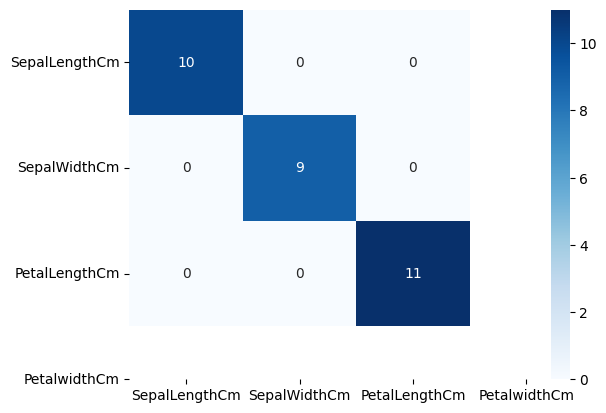

In [14]:
import seaborn as sns
sns.heatmap(cm,annot = True,fmt= "d",cmap = "Blues",xticklabels=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalwidthCm"],yticklabels = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalwidthCm"])
plt.show()

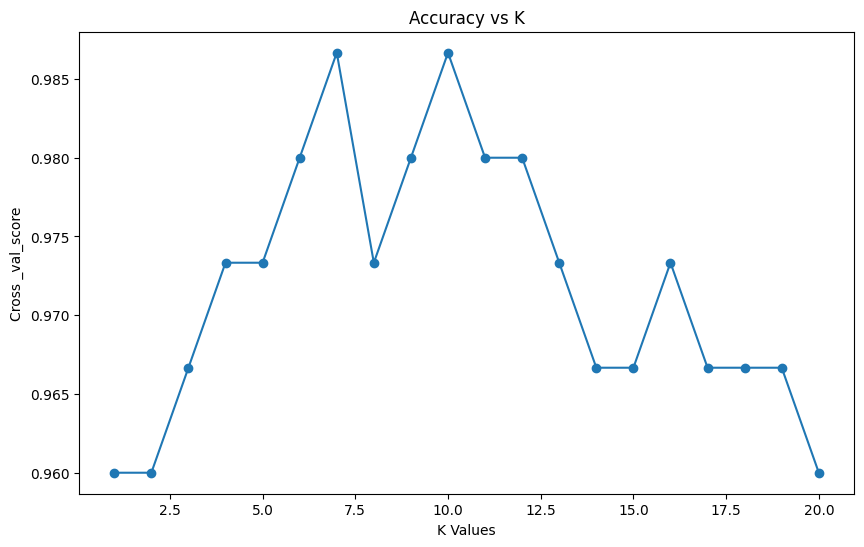

Optimal_K value: 7


In [15]:
#diagram of k values vs accuracy
accuracy_sc = []
from sklearn.model_selection import cross_val_score
K = np.arange(1,21)

for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X,Y,cv = 5)
    accuracy_sc.append(scores.mean())
plt.figure(figsize=(10,6))
plt.plot(K,accuracy_sc,marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Cross _val_score")
plt.title("Accuracy vs K")
plt.show()
optimal_k = K[accuracy_sc.index(max(accuracy_sc))]
print("Optimal_K value:",optimal_k)

                               

In [16]:
# import seaborn as sns
# sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],yticklabels =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("Confusion Matrix")
# plt.show()

In [17]:
# K = list(range(1,21))
# acc = []
# for k in K :
#     knn = KNeighborsClassifier(n_neighbors = k)
#     scores = cross_val_score(knn,X,Y,cv = 5)
#     acc.append(scores.mean())
    

In [18]:
# plt.figure(figsize = (10,6))
# plt.plot(K,acc,marker = 'o')
# plt.title("Accuracy Vs K")
# plt.xlabel("K values")
# plt.ylabel("Accuracy ")
# plt.show()

In [19]:
data = pd.read_csv('lungcancer.csv')
data.head()


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [20]:
data = data.drop(["Name","Surname"],axis = 1)


In [21]:
Y = data['Result']
Y.head()



0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [22]:
X = data.drop("Result",axis = 1)
X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
X_test.shape

(12, 4)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [27]:
knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn.predict(X_test)
acc = accuracy_score(Y_test,y_pred)


In [29]:
acc

0.9166666666666666

In [30]:
cm = confusion_matrix(Y_test,y_pred)

In [31]:
cm

array([[8, 0],
       [1, 3]], dtype=int64)

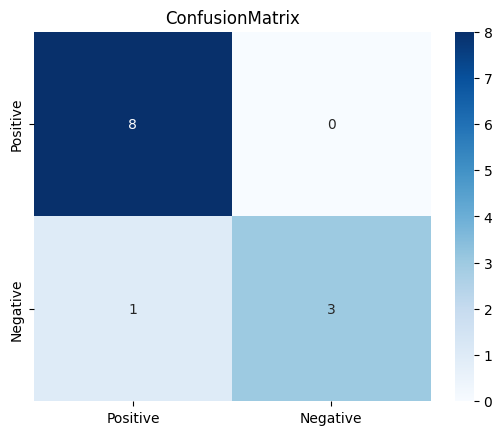

In [32]:
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels = ["Positive","Negative"] ,yticklabels = ["Positive","Negative"])
plt.title("ConfusionMatrix")
plt.show()